1. In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

2. As described above, learning rates that grow smaller over time can help find and get closer to global minima. In the loop above, our `learning_rate_m` and `learning_rate_b` are constant through the process of minimizing our parameters. How could you change the loop to reduce the learning rates over loop iterations?

SGD:     y = 88.89 * x + 32912.24
Lin Reg: y = 87.69 * x + 34754.08


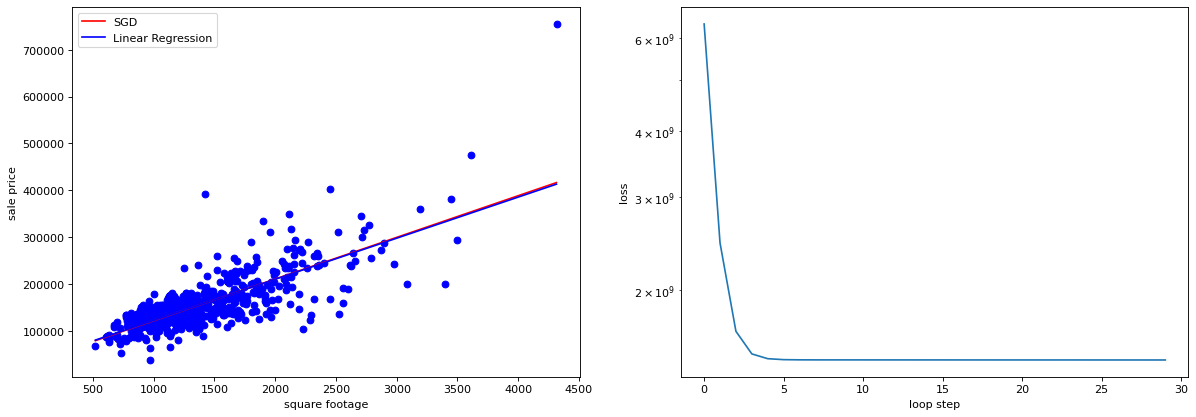

In [3]:
# Comparing stochastic gradient descent and simple linear regression.
# 
# Alex Smith (SmithAlexLee30@gmail.com)
# 9/23/22

from pandas import read_csv
from numpy import arange, sum, power, mean, asarray
from matplotlib import pyplot

def linear_regression(xs, ys, n):
   sum_xy = sum(xs * ys)
   sum_x = sum(xs)
   sum_y = sum(ys)
   sum_x2 = sum(xs * xs)
   denominator = n * sum_x2 - sum_x * sum_x

   m = (n * sum_xy - sum_x * sum_y) / denominator
   b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

   return m, b

def linear_model(x, m, b):
   return m * x + b

def calc_loss(x, y, m, b):
   predictedY = linear_model(x, m, b)
   return power(y - predictedY, 2)

def update_m(x, y, m, b, learning_rate):
   dL_dm = - 2 * x * (y - linear_model(x, m, b))
   dL_dm = mean(dL_dm)
   return m - learning_rate * dL_dm

def update_b(x, y, m, b, learning_rate):
   dL_db = - 2 * (y - linear_model(x, m, b))
   dL_db = mean(dL_db)
   return b - learning_rate * dL_db

def sgd(xs, ys, m, b, learningRateM, learningRateB, numIterations):
   newM = m
   newB = b
   losses = []  # List of the losses throughout the calculation.

   for i in range(numIterations):

      # update our slope and intercept based on the current values
      newM = update_m(xs, ys, newM, newB, learningRateM)
      newB = update_b(xs, ys, newM, newB, learningRateB)

      # Calculate loss and append it to the history.
      losses.append(mean(calc_loss(xs, ys, newM, newB)))
   
   return newM, newB, losses


# ===================================================================== #


m = 5.               # Initial slope.
b = 1000.            # Initial y-intercept.
batchSize = 60       # Number of values to be randomly sampled from the data for each iteration.
lRateM0 = 1e-7       # Initial slope learning rate.
lRateB0 = 1e-1       # Initial y-intercept learning rate.
numIterations = 30   # Number of iterations to perform.

# Read and split real estate data.
data = read_csv('../01_machineLearning/slimmed_realestate_data.csv')
dataX = data['GrLivArea'].to_numpy() # convert panda data to numpy arrays
dataY = data['SalePrice'].to_numpy()
n = len(data)

# Perform the simple linear regression and stochastic gradient decent (SGD).
linRegM, linRegB = linear_regression(dataX, dataY, n)
m, b, lossHistory = sgd(dataX, dataY, m, b, lRateM0, lRateB0, numIterations)

# Print the final linear models of each method.
print('SGD:     y = %.2f * x + %.2f\nLin Reg: y = %.2f * x + %.2f'
   % (m, b, linRegM, linRegB))

# Create a 1 by 2 plot grid.
fig, ax = pyplot.subplots(1, 2, figsize=(18, 6), dpi=80) 
ax[0].set_xlabel('square footage')
ax[0].set_ylabel('sale price')
ax[1].set_yscale('log')
ax[1].set_xlabel('loop step')
ax[1].set_ylabel('loss')

# Plot the real estate data points.
ax[0].plot(dataX, dataY, 'bo') # 'bo' = blue circles.

# Plot the SGD line.
regressionXs = arange(dataX.min(), dataX.max())
sgdYs = regressionXs * m + b
ax[0].plot(regressionXs, sgdYs, 'r-', label='SGD') # 'r-' = red line

# Plot the simple linear regression line.
linRegYs = regressionXs * linRegM + linRegB
ax[0].plot(regressionXs, linRegYs,'b-', label='Linear Regression') # 'b-' = blue line
ax[0].legend()

# Plot the loss history.
lossXs = arange(0, len(lossHistory))
lossYs = asarray(lossHistory)
ax[1].plot(lossXs, lossYs)
pyplot.show()

3. Follow the example from the previous notebook [Linear Regression using SGD](./01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of these 4 clusters using k-means.